In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

import gc

In [2]:
df = pd.read_csv("./Placement_Data_Full_Class.csv")
df = df.fillna(0)

In [3]:
plt.style.use("fivethirtyeight")

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
def anova_test(dataset, column_list, cat_column):

    """
    Takes a dataset, categorical column and a list of numerical columns and returns an One Way ANOVA breakdown
    for all of them
    """
    f_scores = []
    prob = []
    #ds = pd.DataFrame({"column" : dataset[column_list], "cat" : dataset[cat_column]}, index=range(len(dataset)))
    for col in column_list:
   
        column_one = dataset[col]
        column_two = dataset[cat_column]

        ds = pd.concat([column_one, column_two], axis=1)
        ds.columns = ["numeric", "categoric"]
    
        model = ols("numeric ~ categoric", data=ds).fit()
        anova = sm.stats.anova_lm(model, type=2)
        f_scores.append(anova.iloc[0,3])
        prob.append(anova.iloc[0,4])
    
    temp_dataset = pd.DataFrame({"name": column_list, "f_score_values" : f_scores, "probability" : np.round(prob,7)})
    
    return temp_dataset

In [12]:
numerical_columns = ["ssc_p","hsc_p","degree_p","mba_p"]
categorical_column = ["status"]
anova_df = anova_test(df,numerical_columns,categorical_column)

In [14]:
anova_df

,name,f_score_values,probability
0,ssc_p,124.842506,0.000000
1,hsc_p,67.745188,0.000000
2,degree_p,63.719176,0.000000
3,mba_p,1.267810,0.261445


Text(-10, 3.7, 'Determines if the scores of placed and non-placed students have a statistically significant difference in means.')

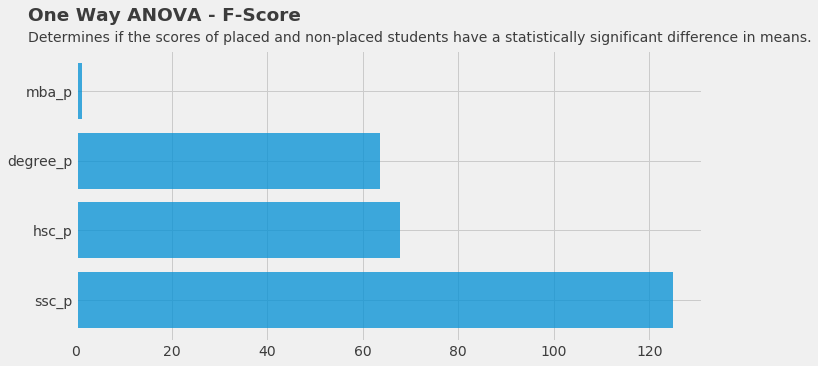

In [45]:
fig, ax = plt.subplots(figsize=(10,5))


plt.barh(anova_df["name"],anova_df["f_score_values"], alpha=0.75)

plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)


#Title
plt.text(x=-10,y=4.0,s="One Way ANOVA - F-Score", weight="bold",
         alpha=0.75, fontsize=18.5)
plt.text(x=-10,y=3.7,s="Determines if the scores of placed and non-placed students have a statistically significant difference in means.", alpha=0.75)

15

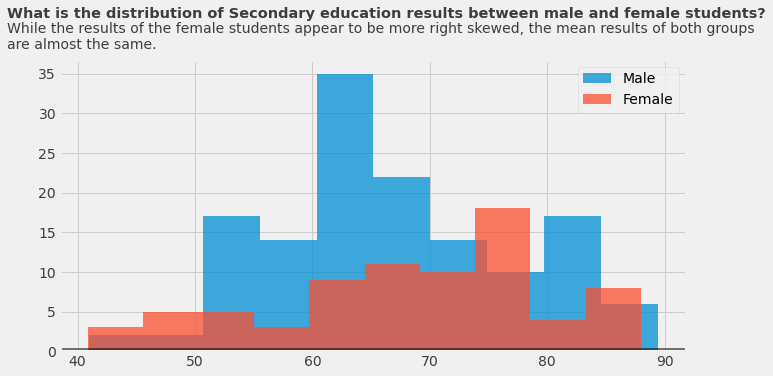

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

#Data
ssc_p_male = df[df["gender"] == "M"]["ssc_p"]
ssc_p_female = df[df["gender"] == "F"]["ssc_p"]

#Plot
plt.hist(ssc_p_male,alpha=0.75, label="Male")
plt.hist(ssc_p_female,alpha=0.75, label="Female")

plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)

ax.axhline(y = 0.30, color = "black", linewidth = 1.5, alpha = .7)

#Title
plt.text(x=34,y=42,s="What is the distribution of Secondary education results between male and female students?", weight="bold",
         alpha=0.75, fontsize=14.5)
plt.text(x=34,y=38.1,s="While the results of the female students appear to be more right skewed, the mean results of both groups\nare almost the same.", alpha=0.75)

plt.legend()

del ssc_p_male, ssc_p_female

gc.collect()

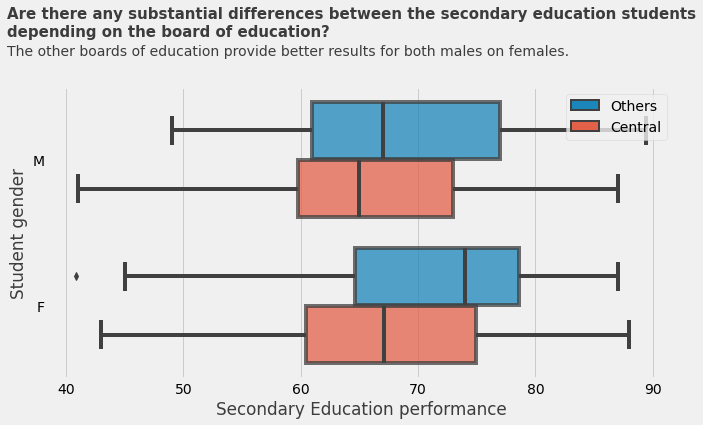

In [6]:
ax , fig = plt.subplots(figsize=(10,5))

#Plot
sns.boxplot(x="ssc_p",y="gender",hue="ssc_b",boxprops=dict(alpha=0.75),data=df)

plt.xlabel("Secondary Education performance", alpha=0.75)
plt.ylabel("Student gender", alpha=0.75)

#Title
plt.text(x=35,y=-0.85,s="Are there any substantial differences between the secondary education students\ndepending on the board of education?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=35,y=-0.72,s="The other boards of education provide better results for both males on females.", alpha=0.75)

plt.legend(loc="upper right")


In [7]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


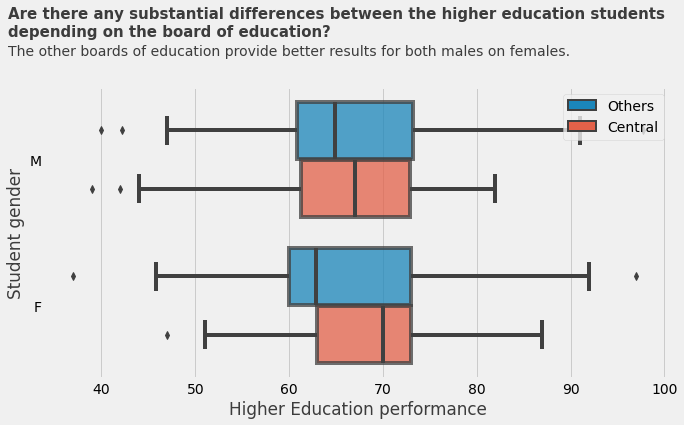

In [8]:
ax , fig = plt.subplots(figsize=(10,5))

#Plot
sns.boxplot(x="hsc_p",y="gender",hue="hsc_b",boxprops=dict(alpha=0.75),data=df)

plt.xlabel("Higher Education performance", alpha=0.75)
plt.ylabel("Student gender", alpha=0.75)

#Title
plt.text(x=30,y=-0.85,s="Are there any substantial differences between the higher education students\ndepending on the board of education?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=30,y=-0.72,s="The other boards of education provide better results for both males on females.", alpha=0.75)

plt.legend(loc="upper right")


4137

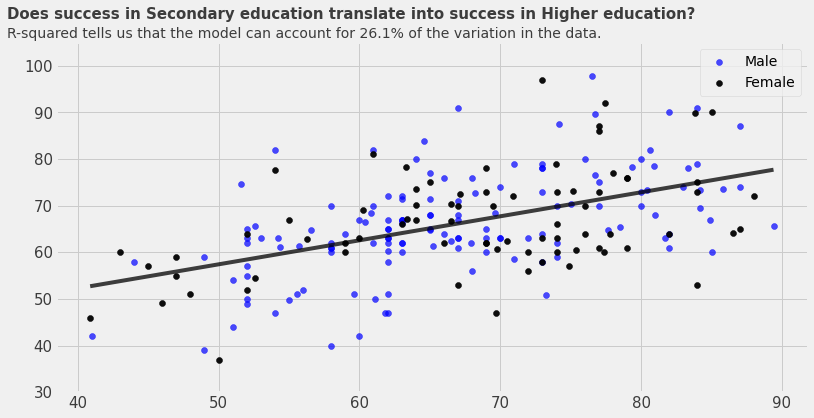

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

#Data
male = df[df["gender"]=="M"]
female = df[df["gender"]=="F"]

#Scatter
plt.scatter(male["ssc_p"],male["hsc_p"],color="blue",alpha=0.7, label="Male")
plt.scatter(female["ssc_p"],female["hsc_p"],color="black",alpha=0.95, label="Female")

#Axis
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)
plt.ylim(30,105)

#Line Fit
x = df["ssc_p"] 
y = df["hsc_p"]

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black", alpha=0.75)


#Title and Subtitle
plt.text(x=35,y=110,s="Does success in Secondary education translate into success in Higher education?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=35,y=106, s="R-squared tells us that the model can account for 26.1% of the variation in the data.", alpha=0.75)
plt.legend()
del x,y,male,female

gc.collect()

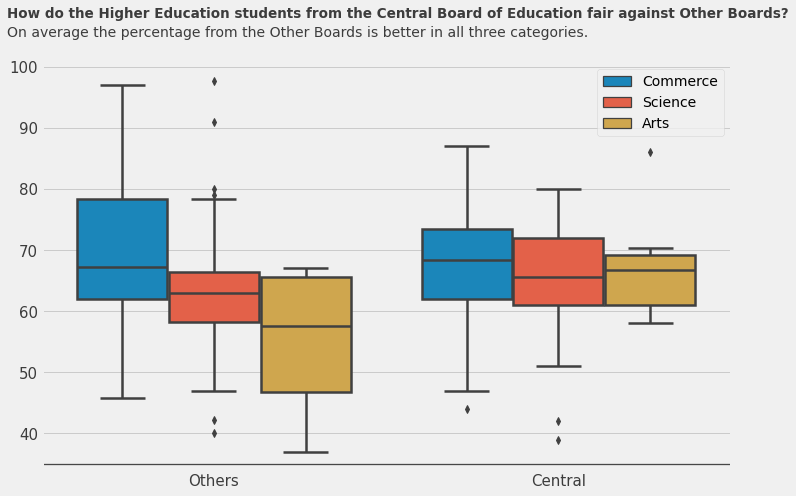

In [10]:
fig,ax = plt.subplots(figsize=(11,7))

#Boxplot
sns.boxplot("hsc_b","hsc_p",hue="hsc_s",linewidth=2.5,data=df)

#Axis
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.axhline(y = 35, color = 'black', linewidth = 1.3, alpha = .7)
plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)

ax.set_ylabel("")
ax.set_xlabel("")

#Title
plt.text(x=-0.60,y=108,s="How do the Higher Education students from the Central Board of Education fair against Other Boards?", weight="bold",
         alpha=0.75, fontsize=13.5)
plt.text(x=-0.60,y=105, s="On average the percentage from the Other Boards is better in all three categories.", alpha=0.75)
plt.legend()

2951

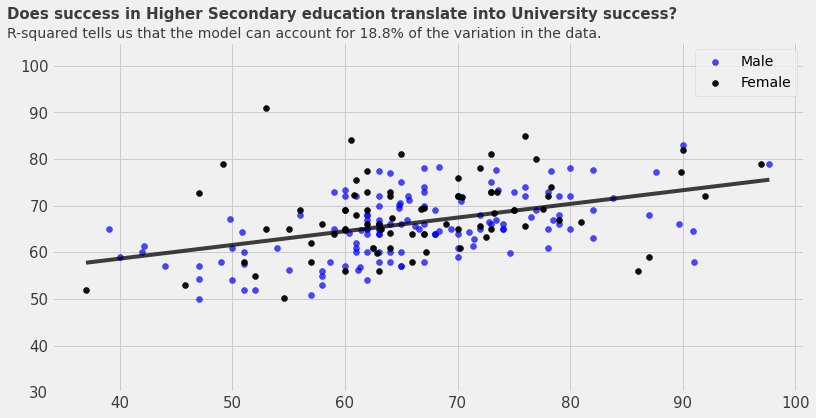

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

#Data
male = df[df["gender"]=="M"]
female = df[df["gender"]=="F"]

#Scatter
plt.scatter(male["hsc_p"],male["degree_p"],color="blue",alpha=0.7, label="Male")
plt.scatter(female["hsc_p"],female["degree_p"],color="black",alpha=0.95, label="Female")

#Axis
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.axhline(y = 30, color = 'black', linewidth = 1.3, alpha = .7)
plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)
plt.ylim(30,105)

#Line Fit
x = df["hsc_p"] 
y = df["degree_p"]

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="black", alpha=0.75)


#Title and Subtitle
plt.text(x=30,y=110,s="Does success in Higher Secondary education translate into University success?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=30,y=106, s="R-squared tells us that the model can account for 18.8% of the variation in the data.", alpha=0.75)
plt.legend()
del x,y,male,female

gc.collect()

In [12]:
df["hsc_s"].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

2978

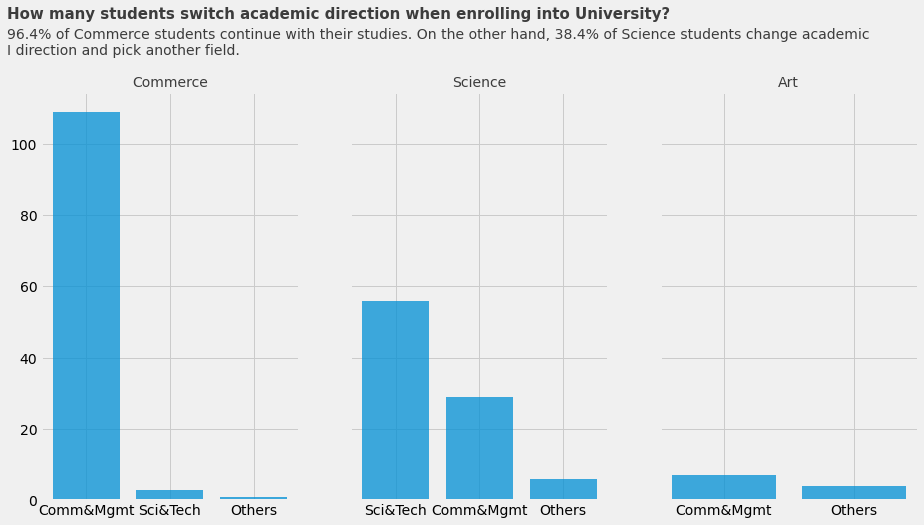

In [13]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(14,7))

#Data

commerce = df.query("hsc_s == 'Commerce'")
science = df.query("hsc_s == 'Science'")
art = df.query("hsc_s == 'Arts'")

comm_counts = commerce["degree_t"].value_counts()
sci_counts = science["degree_t"].value_counts()
art_counts = art["degree_t"].value_counts()
#Plot

#Subplot one
#plt.subplot(1,3,1)
ax[0].bar(comm_counts.index, comm_counts, alpha=0.75)
ax[0].set_title("Commerce",fontsize=14, alpha=0.75)

#plt.subplot(1,3,2)
ax[1].bar(sci_counts.index, sci_counts, alpha=0.75)
ax[1].set_title("Science",fontsize=14, alpha=0.75)

#plt.subplot(1,3,3)
ax[2].bar(art_counts.index, art_counts, alpha=0.75)
ax[2].set_title("Art",fontsize=14, alpha=0.75)

#Main title
plt.text(x=-5.50,y=135,s="How many students switch academic direction when enrolling into University?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=-5.50,y=125, s="96.4% of Commerce students continue with their studies. On the other hand, 38.4% of Science students change academic \nI direction and pick another field.", alpha=0.75)

del commerce, science, art, comm_counts, sci_counts, art_counts

gc.collect()

Text(-4.6, 0.85, 'The largest discrepancy of around 8% can be found in the Scientific Department.')

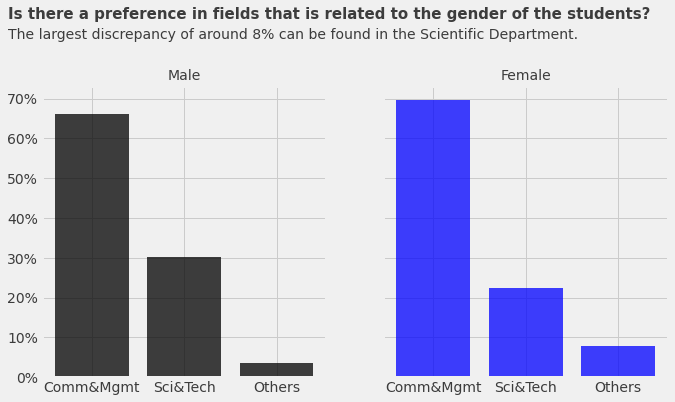

In [14]:
fig, ax = plt.subplots(1,2,sharey=True,sharex= True, figsize=(10,5))

#Data
male = df.query("gender == 'M'")
female = df.query("gender == 'F'")
male_percent = male["degree_t"].value_counts() / male["degree_t"].value_counts().sum()
female_percent = female["degree_t"].value_counts() / female["degree_t"].value_counts().sum()

#Subplot one
ax[0].bar(male_percent.index,male_percent, color="black", alpha=0.75)
ax[0].set_title("Male", fontsize=14, alpha=0.75)

#Subplot two
ax[1].bar(female_percent.index,female_percent,color="blue", alpha=0.75)
ax[1].set_title("Female", fontsize=14, alpha=0.75)

ax[0].set_yticklabels(["0%","10%","20%","30%","40%","50%","60%","70%"], alpha=0.75)

ax[0].set_xticklabels(male_percent.index,alpha=0.75)
ax[1].set_xticklabels(male_percent.index,alpha=0.75)

#Main title
plt.text(x=-4.60,y=0.90,s="Is there a preference in fields that is related to the gender of the students?", weight="bold",
         alpha=0.75, fontsize=15)
plt.text(x=-4.60,y=0.85, s="The largest discrepancy of around 8% can be found in the Scientific Department.", alpha=0.75)

Text(30, 0.075, 'What is the density of the degree percentages for the individual degree types?')

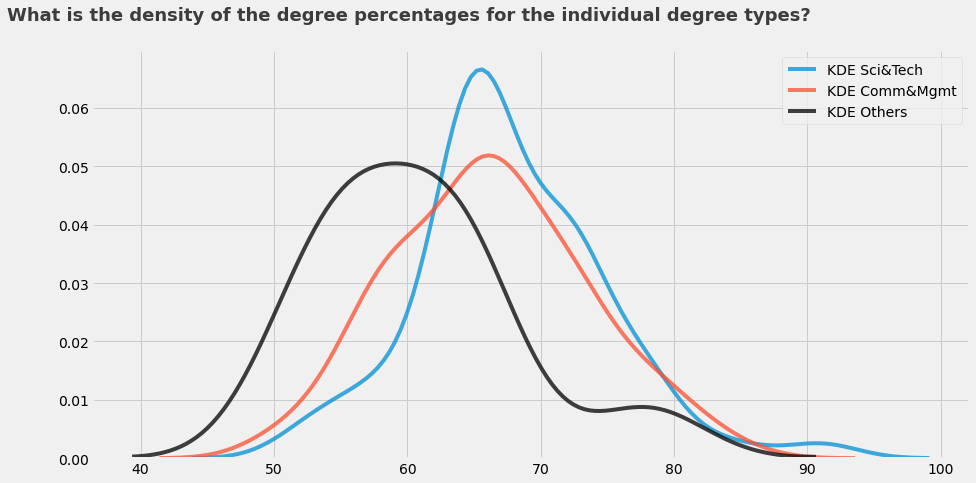

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
#Data
sci = df.query("degree_t == 'Sci&Tech'")
comm = df.query("degree_t == 'Comm&Mgmt'")
other = df.query("degree_t == 'Others'")
#Plot
sns.kdeplot(sci["degree_p"],alpha=0.75, label="KDE Sci&Tech")
sns.kdeplot(comm["degree_p"],alpha=0.75,label="KDE Comm&Mgmt")
sns.kdeplot(other["degree_p"],color="black",alpha=0.75, label="KDE Others")

#Title
plt.text(x=30,y=0.075,s="What is the density of the degree percentages for the individual degree types?", weight="bold",
         alpha=0.75, fontsize=18)

6189

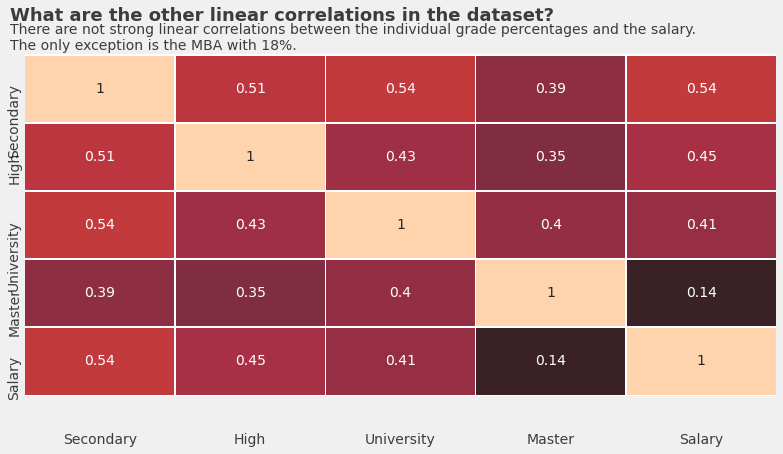

In [16]:
fig, ax = plt.subplots(figsize=(12,7))

#Data
df_numeric = df[["ssc_p","hsc_p","degree_p","mba_p","salary"]]
df_numeric = df_numeric.corr()

#Heatmap
ax = sns.heatmap(df_numeric, annot=True,annot_kws={"size": 14},linewidths=.5,center=0,cbar=False)

ax.set_xticklabels(["Secondary","High","University","Master","Salary"],alpha=0.75)
ax.set_yticklabels(["Secondary","High","University","Master","Salary"],alpha=0.75)

#Heatmap bug fix
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#Title
plt.text(x=-0.10,y=-0.5,s="What are the other linear correlations in the dataset?", weight="bold",
         alpha=0.75, fontsize=18)
plt.text(x=-0.10,y=-0.08,s="There are not strong linear correlations between the individual grade percentages and the salary.\nThe only exception is the MBA with 18%.",
         alpha=0.75, fontsize=14)

del df_numeric

gc.collect()

In [17]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


3292

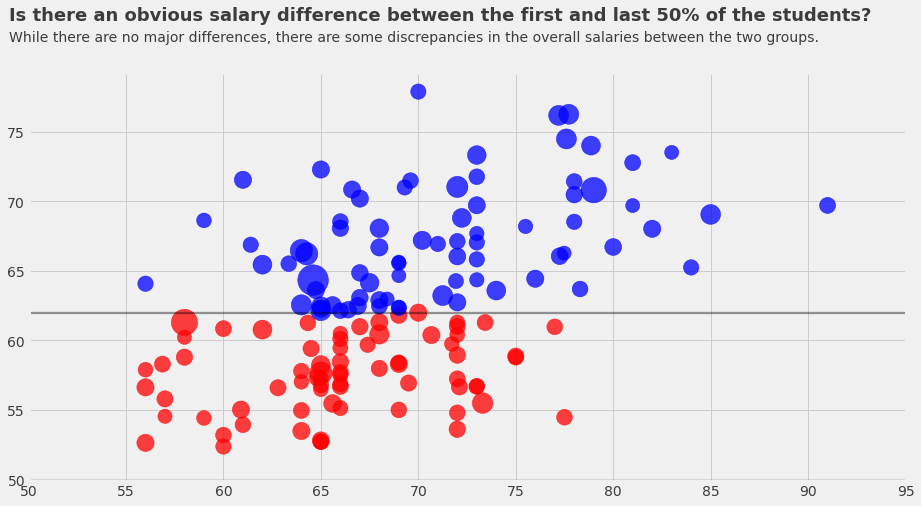

In [18]:
fig, ax = plt.subplots(figsize=(14,7))

#Data
#Student quartile seperation into the first 50% and the last 50% depending on their MBA grades.
first = df[df["mba_p"] <= 62.0]
second_group = df[df["mba_p"] > 62.0]

#Plot
plt.scatter(first["degree_p"],first["mba_p"],s=first["salary"]/1000, color="red", alpha=0.75, label="Top 50%")
plt.scatter(second_group["degree_p"],second_group["mba_p"],s=second_group["salary"]/1000, color="blue", alpha=0.75, label="Bottom 50%")

ax.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = 0.7)
ax.axhline(y = 62, color = 'black', linewidth = 2.3, alpha = 0.4)
plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)
ax.set_xlim(50,95)


#Title
plt.text(x=49,y=83,s="Is there an obvious salary difference between the first and last 50% of the students?", weight="bold",
         alpha=0.75, fontsize=18)
plt.text(x=49,y=81.5,s="While there are no major differences, there are some discrepancies in the overall salaries between the two groups.",
         alpha=0.75, fontsize=14)

gc.collect()

Text(-35, 0.0555, "The top group's distribution is more right-skewed towards higher salaries.This is further backed by the mean of the two distributions,\nwhere the mean of the top group is approx 40k higher.")

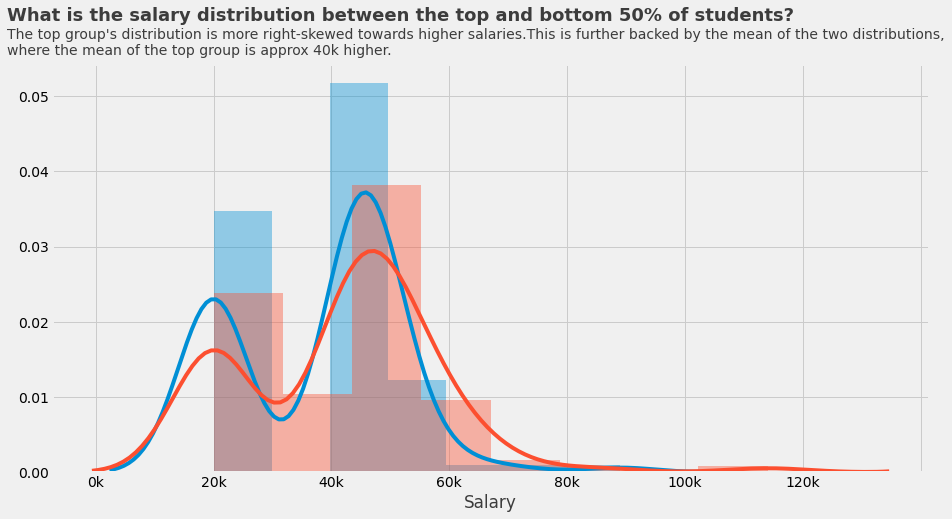

In [19]:
fig, ax = plt.subplots(figsize=(14,7))

#Plot
sns.distplot(first["salary"]/10000)
sns.distplot(second_group["salary"]/10000)

ax.set_xticklabels(["-20k","0k","20k","40k","60k","80k","100k","120k"])
plt.xlabel("Salary", alpha=0.75)
#Title
plt.text(x=-35,y=0.06,s="What is the salary distribution between the top and bottom 50% of students?", weight="bold",
         alpha=0.75, fontsize=18)
plt.text(x=-35,y=0.0555,s="The top group's distribution is more right-skewed towards higher salaries.This is further backed by the mean of the two distributions,\nwhere the mean of the top group is approx 40k higher.",
         alpha=0.75, fontsize=14)

In [20]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


2806

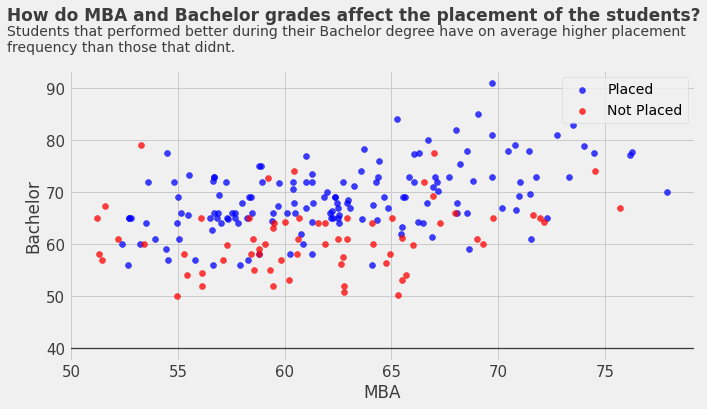

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

#Data
placed = df[df["status"]=="Placed"]
notplaced= df[df["status"]=="Not Placed"]

#Plot

plt.scatter(placed["mba_p"],placed["degree_p"],color="blue",alpha=0.75, label="Placed")
plt.scatter(notplaced["mba_p"],notplaced["degree_p"],color="red",alpha=0.75, label="Not Placed")

#Axis
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.axhline(y = 40, color = 'black', linewidth = 1.3, alpha = .7)
plt.xticks(alpha=0.75)
plt.yticks(alpha=0.75)
plt.xlabel("MBA",alpha=.75)
plt.ylabel("Bachelor",alpha=.75)

#Title
plt.text(x=47,y=103,s="How do MBA and Bachelor grades affect the placement of the students?", weight="bold",
         alpha=0.75, fontsize=17)
plt.text(x=47,y=97,s="Students that performed better during their Bachelor degree have on average higher placement\nfrequency than those that didnt.",
         alpha=0.75, fontsize=14)

plt.legend()

del placed, notplaced

gc.collect()